<a href="https://colab.research.google.com/github/ahcamachod/2096-visualizacion-de-datos-estilizando-tablas-con-python/blob/main/Estilizacion_de_tablas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Visualization: Estilizando tablas con python**

## **Extracción y preparación de los datos**

In [445]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [446]:
ventas = pd.read_csv('https://gist.githubusercontent.com/ahcamachod/d2efadda3f3833d65da750c64705ac42/raw/80aef6f3bad210d34b67ed85565f039a30e2d9e0/ventas.csv', sep='#')
ventas.head()

,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,ciudad,provincia,region,departamento,tipo_producto,precio_base,precio_unit_sin_descuento,descuento,precio_unit_venta,cantidad,ventas,ganancia
0,2018-11-09,2018-11-12,Económica,Gaspar Fernández,B2C,Lomas de Zamora,Buenos Aires,Buenos Aires,Materiales de construcción,Fontanería,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Económica,Gaspar Fernández,B2C,Lomas de Zamora,Buenos Aires,Buenos Aires,Materiales de construcción,Herramientas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Económica,Matías González,B2B,Córdoba,Córdoba,Central,Jardinería y paisajismo,Semillas,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega estándar,Lucas González,B2C,Gualeguay,Entre Ríos,Litoral,Materiales de construcción,Materiales de revestimiento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega estándar,Lucas González,B2C,Gualeguay,Entre Ríos,Litoral,Jardinería y paisajismo,Macetas,35.88,42.24,0.100,38.02,2,76.04,4.28


In [447]:
ventas = ventas[['fecha_pedido','modo_envio','nombre_cliente','segmento_cliente','ciudad','provincia','region','departamento','tipo_producto','ventas','cantidad','ganancia']]
ventas.head(2)

,fecha_pedido,modo_envio,nombre_cliente,segmento_cliente,ciudad,provincia,region,departamento,tipo_producto,ventas,cantidad,ganancia
0,2018-11-09,Económica,Gaspar Fernández,B2C,Lomas de Zamora,Buenos Aires,Buenos Aires,Materiales de construcción,Fontanería,890.66,2,71.26
1,2018-11-09,Económica,Gaspar Fernández,B2C,Lomas de Zamora,Buenos Aires,Buenos Aires,Materiales de construcción,Herramientas,2488.59,3,373.29


In [448]:
print(f'Filas: {ventas.shape[0]}')
print(f'Columnas: {ventas.shape[1]}')

Filas: 8940
Columnas: 12


In [449]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fecha_pedido      8940 non-null   object 
 1   modo_envio        8940 non-null   object 
 2   nombre_cliente    8940 non-null   object 
 3   segmento_cliente  8940 non-null   object 
 4   ciudad            8940 non-null   object 
 5   provincia         8940 non-null   object 
 6   region            8940 non-null   object 
 7   departamento      8940 non-null   object 
 8   tipo_producto     8940 non-null   object 
 9   ventas            8940 non-null   float64
 10  cantidad          8940 non-null   int64  
 11  ganancia          8940 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 838.2+ KB


In [450]:
ventas.isnull().sum()

,0
fecha_pedido,0
modo_envio,0
nombre_cliente,0
segmento_cliente,0
ciudad,0
provincia,0
region,0
departamento,0
tipo_producto,0
ventas,0


In [451]:
from datetime import datetime

In [452]:
ventas['fecha_pedido'] = pd.to_datetime(ventas['fecha_pedido'], format='%Y-%m-%d')
ventas.head(2)

<ipython-input-452-a1409e7f3397>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventas['fecha_pedido'] = pd.to_datetime(ventas['fecha_pedido'], format='%Y-%m-%d')


,fecha_pedido,modo_envio,nombre_cliente,segmento_cliente,ciudad,provincia,region,departamento,tipo_producto,ventas,cantidad,ganancia
0,2018-11-09,Económica,Gaspar Fernández,B2C,Lomas de Zamora,Buenos Aires,Buenos Aires,Materiales de construcción,Fontanería,890.66,2,71.26
1,2018-11-09,Económica,Gaspar Fernández,B2C,Lomas de Zamora,Buenos Aires,Buenos Aires,Materiales de construcción,Herramientas,2488.59,3,373.29


In [453]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fecha_pedido      8940 non-null   datetime64[ns]
 1   modo_envio        8940 non-null   object        
 2   nombre_cliente    8940 non-null   object        
 3   segmento_cliente  8940 non-null   object        
 4   ciudad            8940 non-null   object        
 5   provincia         8940 non-null   object        
 6   region            8940 non-null   object        
 7   departamento      8940 non-null   object        
 8   tipo_producto     8940 non-null   object        
 9   ventas            8940 non-null   float64       
 10  cantidad          8940 non-null   int64         
 11  ganancia          8940 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 838.2+ KB


In [454]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'indigo'})
plt.figure(figsize=(20,6))

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

## Misión 1: Equipo de Ventas

Necesitamos construir una visualización para indicar los **10 principales clientes por total de ventas**.

Con ello, el equipo de ventas puede pensar en estrategias para mantener a estos clientes comprando en nuestra tienda.

In [455]:
clientes = ventas.groupby('nombre_cliente')['ventas'].sum().nlargest(10).copy()
clientes = clientes.reset_index()
clientes

,nombre_cliente,ventas
0,Víctor Carrasco,73370.61
1,Brisa Rojas,68868.11
2,Mateo Vargas,62749.75
3,Vicente Rojas,59544.11
4,Laura Rojas,51398.87
5,Lucía Díaz,48178.99
6,Cristina Barrios,47610.80
7,Alejandro Sánchez,43769.25
8,Pamela Huerta,42354.19
9,Carlos Sánchez,41238.81


In [456]:
clientes.columns = ['Clientes', 'Ventas']
clientes

,Clientes,Ventas
0,Víctor Carrasco,73370.61
1,Brisa Rojas,68868.11
2,Mateo Vargas,62749.75
3,Vicente Rojas,59544.11
4,Laura Rojas,51398.87
5,Lucía Díaz,48178.99
6,Cristina Barrios,47610.80
7,Alejandro Sánchez,43769.25
8,Pamela Huerta,42354.19
9,Carlos Sánchez,41238.81


In [457]:
clientes['Ranking'] = clientes.index + 1
clientes

,Clientes,Ventas,Ranking
0,Víctor Carrasco,73370.61,1
1,Brisa Rojas,68868.11,2
2,Mateo Vargas,62749.75,3
3,Vicente Rojas,59544.11,4
4,Laura Rojas,51398.87,5
5,Lucía Díaz,48178.99,6
6,Cristina Barrios,47610.80,7
7,Alejandro Sánchez,43769.25,8
8,Pamela Huerta,42354.19,9
9,Carlos Sánchez,41238.81,10


In [458]:
clientes.set_index('Ranking', inplace=True)
clientes

,Clientes,Ventas
Ranking,,
1,Víctor Carrasco,73370.61
2,Brisa Rojas,68868.11
3,Mateo Vargas,62749.75
4,Vicente Rojas,59544.11
5,Laura Rojas,51398.87
6,Lucía Díaz,48178.99
7,Cristina Barrios,47610.80
8,Alejandro Sánchez,43769.25
9,Pamela Huerta,42354.19


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

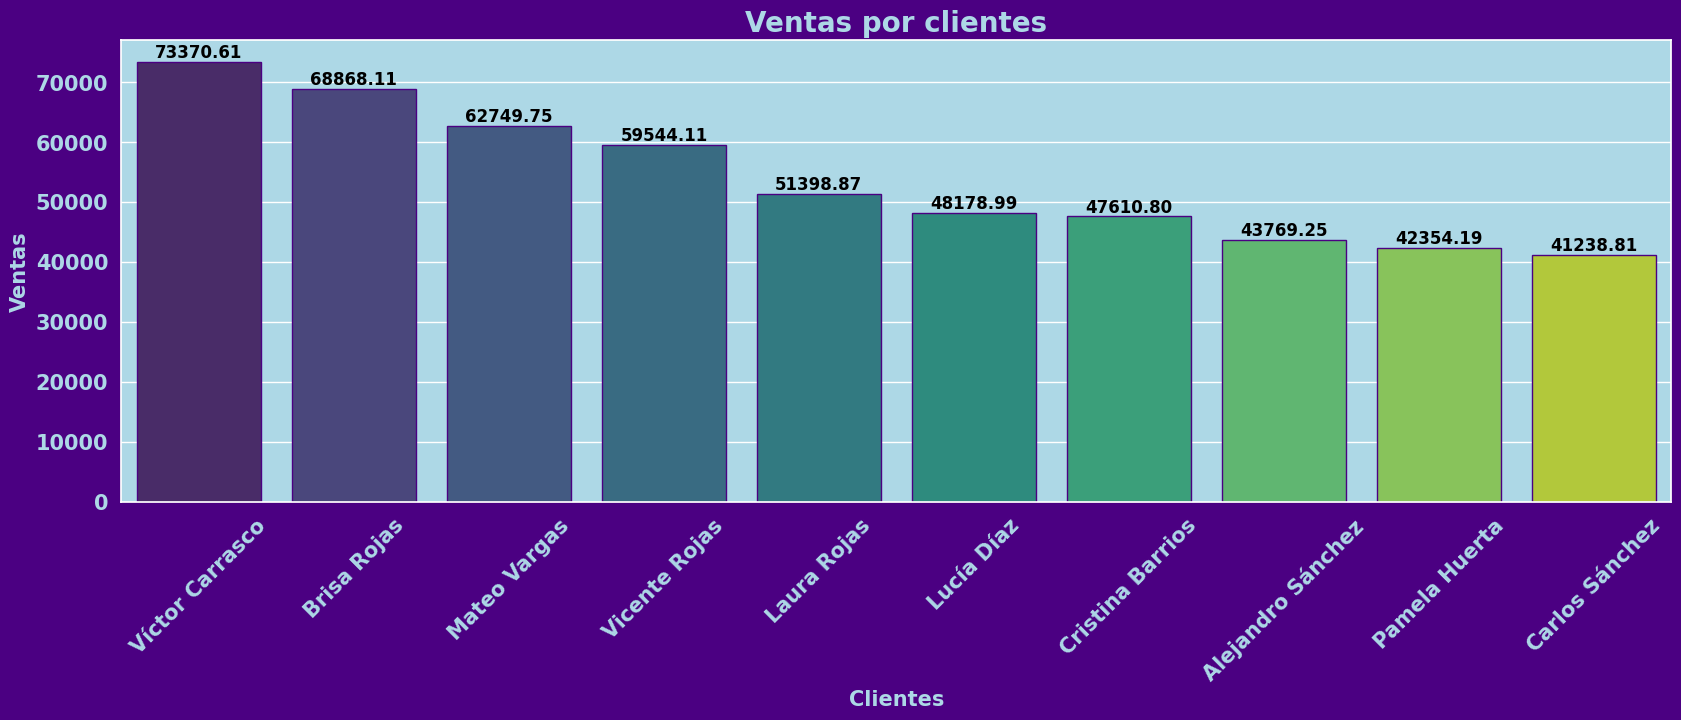

In [459]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'indigo'})
plt.figure(figsize=(20,6))
barplot = sns.barplot(data=clientes, x='Clientes', y='Ventas',hue='Clientes', palette='viridis',edgecolor='indigo')
# Añadir los números encima de las barras
for bar in barplot.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2, # Get the center x-coordinate of the bar
        bar.get_height() + 0.1, # Get the y-coordinate (height of the bar)
        f'{bar.get_height():.2f}', # Format the value with 2 decimal places
        color='black',
        va='bottom', # Alinear verticalmente desde el fondo
        ha='center', # Centrar horizontalmente
        fontweight='bold',
    )
plt.title('Ventas por clientes', color='lightblue', fontsize=20, weight='bold')
plt.xlabel('Clientes', color='lightblue', fontsize=15, weight='bold')
plt.ylabel('Ventas', color='lightblue', fontsize=15, weight='bold')
plt.xticks(color='lightblue', fontsize=15, weight='bold', rotation=45)
plt.yticks(color='lightblue', fontsize=15, weight='bold')
plt.show()

# Misión 2: Equipo Comercial

Necesitamos construir una visualización que permita asociar el **total de ganancias en ventas y el total de lucros por tipo de producto**.

Ello permitirá que el equipo comercial pueda enfocarse en estrategias para apalancar los ingresos que se reciben con cada tipo de producto vendido en la tienda.

In [460]:
estilo = clientes.style
estilo

,Clientes,Ventas
Ranking,,
1,Víctor Carrasco,73370.610000
2,Brisa Rojas,68868.110000
3,Mateo Vargas,62749.750000
4,Vicente Rojas,59544.110000
5,Laura Rojas,51398.870000
6,Lucía Díaz,48178.990000
7,Cristina Barrios,47610.800000
8,Alejandro Sánchez,43769.250000
9,Pamela Huerta,42354.190000


In [461]:
ganancias_ventas = ventas.groupby(['tipo_producto'])[['ventas','ganancia']].sum()
ganancias_ventas

,ventas,ganancia
tipo_producto,,
Brotes,8811.32,1381.42
Decoración de jardín,82680.08,9939.43
Equipos de limpieza,542304.58,8724.39
Fertilizantes,53144.74,11254.88
Fontanería,373223.88,-5622.34
Herramientas,995158.41,41020.34
Herramientas automotrices,502109.29,63330.22
Herramientas de jardinería,648879.72,53202.88
Iluminación,275229.53,20264.54


In [462]:
ganancias_ventas.index.name = 'Tipo de producto'
ganancias_ventas

,ventas,ganancia
Tipo de producto,,
Brotes,8811.32,1381.42
Decoración de jardín,82680.08,9939.43
Equipos de limpieza,542304.58,8724.39
Fertilizantes,53144.74,11254.88
Fontanería,373223.88,-5622.34
Herramientas,995158.41,41020.34
Herramientas automotrices,502109.29,63330.22
Herramientas de jardinería,648879.72,53202.88
Iluminación,275229.53,20264.54


In [463]:
estilo_producto = ganancias_ventas.style
estilo_producto

,ventas,ganancia
Tipo de producto,,
Brotes,8811.320000,1381.420000
Decoración de jardín,82680.080000,9939.430000
Equipos de limpieza,542304.580000,8724.390000
Fertilizantes,53144.740000,11254.880000
Fontanería,373223.880000,-5622.340000
Herramientas,995158.410000,41020.340000
Herramientas automotrices,502109.290000,63330.220000
Herramientas de jardinería,648879.720000,53202.880000
Iluminación,275229.530000,20264.540000


In [464]:
estilo_producto.format('$USD: {:,.2f}')

,ventas,ganancia
Tipo de producto,,
Brotes,"$USD: 8,811.32","$USD: 1,381.42"
Decoración de jardín,"$USD: 82,680.08","$USD: 9,939.43"
Equipos de limpieza,"$USD: 542,304.58","$USD: 8,724.39"
Fertilizantes,"$USD: 53,144.74","$USD: 11,254.88"
Fontanería,"$USD: 373,223.88","$USD: -5,622.34"
Herramientas,"$USD: 995,158.41","$USD: 41,020.34"
Herramientas automotrices,"$USD: 502,109.29","$USD: 63,330.22"
Herramientas de jardinería,"$USD: 648,879.72","$USD: 53,202.88"
Iluminación,"$USD: 275,229.53","$USD: 20,264.54"


In [465]:
estilo_producto.format('$USD: {:,.2f}').highlight_max(color='green').highlight_min(color='orange')

,ventas,ganancia
Tipo de producto,,
Brotes,"$USD: 8,811.32","$USD: 1,381.42"
Decoración de jardín,"$USD: 82,680.08","$USD: 9,939.43"
Equipos de limpieza,"$USD: 542,304.58","$USD: 8,724.39"
Fertilizantes,"$USD: 53,144.74","$USD: 11,254.88"
Fontanería,"$USD: 373,223.88","$USD: -5,622.34"
Herramientas,"$USD: 995,158.41","$USD: 41,020.34"
Herramientas automotrices,"$USD: 502,109.29","$USD: 63,330.22"
Herramientas de jardinería,"$USD: 648,879.72","$USD: 53,202.88"
Iluminación,"$USD: 275,229.53","$USD: 20,264.54"


In [466]:
#colores de intensos mayor=valor, colores suaves menor=valor
estilo_producto = estilo_producto.format('$USD: {:,.2f}').background_gradient(cmap='Blues')
estilo_producto

,ventas,ganancia
Tipo de producto,,
Brotes,"$USD: 8,811.32","$USD: 1,381.42"
Decoración de jardín,"$USD: 82,680.08","$USD: 9,939.43"
Equipos de limpieza,"$USD: 542,304.58","$USD: 8,724.39"
Fertilizantes,"$USD: 53,144.74","$USD: 11,254.88"
Fontanería,"$USD: 373,223.88","$USD: -5,622.34"
Herramientas,"$USD: 995,158.41","$USD: 41,020.34"
Herramientas automotrices,"$USD: 502,109.29","$USD: 63,330.22"
Herramientas de jardinería,"$USD: 648,879.72","$USD: 53,202.88"
Iluminación,"$USD: 275,229.53","$USD: 20,264.54"


In [467]:
encabezado = {
    'selector': 'th',
    'props': 'font-weight:bold; font-family:Lucida Sans; text-aling:center; text-transform:capitalize; font-style:italic'
}

In [468]:
estilo_producto.set_table_styles([encabezado], overwrite=False)

,ventas,ganancia
Tipo de producto,,
Brotes,"$USD: 8,811.32","$USD: 1,381.42"
Decoración de jardín,"$USD: 82,680.08","$USD: 9,939.43"
Equipos de limpieza,"$USD: 542,304.58","$USD: 8,724.39"
Fertilizantes,"$USD: 53,144.74","$USD: 11,254.88"
Fontanería,"$USD: 373,223.88","$USD: -5,622.34"
Herramientas,"$USD: 995,158.41","$USD: 41,020.34"
Herramientas automotrices,"$USD: 502,109.29","$USD: 63,330.22"
Herramientas de jardinería,"$USD: 648,879.72","$USD: 53,202.88"
Iluminación,"$USD: 275,229.53","$USD: 20,264.54"


# Misión 3: Equipo de Logística

Necesitamos construir una visualización que nos permita entender la **distribución de pedidos por región de Brasil**.

Así, el equipo de logística va a saber dónde hay más oportunidad de enfocar los esfuerzos de material y mano de obra.

In [469]:
#libros = pd.read_csv('https://gist.githubusercontent.com/ahcamachod/52da15c2bbb31e4270b5c267dd051473/raw/62c366878ebd4be2ec899836413c8d1f3e116c01/tienda_libros.csv', sep=',')
#libros.head(2)

In [470]:
region = pd.DataFrame(ventas['region'].value_counts())
region.columns = ['N° Pedidos']
region.index.name = 'Región'
region

,N° Pedidos
Región,
Buenos Aires,2822
Litoral,1924
Norte,1555
Central,1276
Cuyo,915
Patagónica,448


In [471]:
porcentaje = region['N° Pedidos'].to_numpy()
porcentaje = 100 * porcentaje / porcentaje.sum()
porcentaje

array([31.56599553, 21.5212528 , 17.39373602, 14.27293065, 10.23489933,
        5.01118568])

In [472]:
region['Porcentaje de Pedidos'] = porcentaje
region

,N° Pedidos,Porcentaje de Pedidos
Región,,
Buenos Aires,2822,31.565996
Litoral,1924,21.521253
Norte,1555,17.393736
Central,1276,14.272931
Cuyo,915,10.234899
Patagónica,448,5.011186


In [473]:
estilo_region = region.style
estilo_region

,N° Pedidos,Porcentaje de Pedidos
Región,,
Buenos Aires,2822,31.565996
Litoral,1924,21.521253
Norte,1555,17.393736
Central,1276,14.272931
Cuyo,915,10.234899
Patagónica,448,5.011186


In [474]:
encabezado_region = {
    'selector': 'th',
    'props': 'font-weight:bold; font-family:Lucida Sans; text-align:right; text-transform:capitalize; font-style:italic; background-color:black'
}

celdas_region = {
    'selector': 'td',
    'props': 'text-align:right;font-style:italic'
}

In [475]:
estilo_region = estilo_region.set_table_styles([encabezado_region], overwrite=False)

In [476]:
estilo_region = estilo_region.background_gradient(cmap='Blues')
estilo_region

,N° Pedidos,Porcentaje de Pedidos
Región,,
Buenos Aires,2822,31.565996
Litoral,1924,21.521253
Norte,1555,17.393736
Central,1276,14.272931
Cuyo,915,10.234899
Patagónica,448,5.011186


In [477]:
estilo_region = estilo_region.set_table_styles([celdas_region], overwrite=False)
estilo_region

,N° Pedidos,Porcentaje de Pedidos
Región,,
Buenos Aires,2822,31.565996
Litoral,1924,21.521253
Norte,1555,17.393736
Central,1276,14.272931
Cuyo,915,10.234899
Patagónica,448,5.011186


In [478]:
estilo_region.format({'Porcentaje de Pedidos':'{:.2f} %'})\
             .bar(subset='Porcentaje de Pedidos', vmin=0,vmax=100, color='darkviolet').background_gradient(cmap='Blues')

,N° Pedidos,Porcentaje de Pedidos
Región,,
Buenos Aires,2822,31.57 %
Litoral,1924,21.52 %
Norte,1555,17.39 %
Central,1276,14.27 %
Cuyo,915,10.23 %
Patagónica,448,5.01 %


In [479]:
import pandas as pd
import numpy as np

datos = pd.DataFrame({'ID': [1204, 3018, 9963, 1005, 5627],
                   'Edad': [np.nan, 32, 19, np.nan, 38],
                   'Salario': [3500.00, 4200.50, 2800.00, 5700.25, 4900.75]})

In [480]:
s_nan = datos.style.format({'Edad':'{:.0f}','Salario':'{:,.2f}'})\
                   .highlight_null(color='#F79747')
s_nan

,ID,Edad,Salario
0,1204,nan,"3,500.00"
1,3018,32,"4,200.50"
2,9963,19,"2,800.00"
3,1005,nan,"5,700.25"
4,5627,38,"4,900.75"


In [481]:
# Definir los límites superior e inferior
límite_superior = 5000.0
# El límite inferior se especifica a través de una Series que informa cuál es la columna que tendrá la aplicación de la función
límite_inferior = pd.Series([4000.0], index=['Salario'])

# Aplicar la estilización con highlight_between
s_bet = datos.style.format({'Edad':'{:.0f}','Salario':'{:,.2f}'})\
                   .highlight_between(left=límite_inferior, right=límite_superior,
                                      axis=1, color='#94B2D7')\
                  .text_gradient(cmap='inferno', subset='Salario')
s_bet

,ID,Edad,Salario
0,1204,nan,"3,500.00"
1,3018,32,"4,200.50"
2,9963,19,"2,800.00"
3,1005,nan,"5,700.25"
4,5627,38,"4,900.75"


# Misión 4: Equipo de Logística

Nuevamente el equipo de logística desea replantear su estructura y organización de provisionamiento de productos e, para ello, se pensó en una visualización que permita identificar el estándar de la **cantidad de productos solicitados por mes por departamento**.

In [482]:
meses = ventas.copy()
meses = meses.sort_values('fecha_pedido')
meses

,fecha_pedido,modo_envio,nombre_cliente,segmento_cliente,ciudad,provincia,region,departamento,tipo_producto,ventas,cantidad,ganancia
7171,2016-01-04,Entrega estándar,Ramiro Guzmán,B2C,Rosario,Santa Fe,Litoral,Jardinería y paisajismo,Pesticidas,55.92,2,9.44
651,2016-01-05,Entrega estándar,Jerónimo Cortés,B2B,Pergamino,Buenos Aires,Buenos Aires,Jardinería y paisajismo,Herramientas de jardinería,12.04,2,-9.32
650,2016-01-05,Entrega estándar,Jerónimo Cortés,B2B,Pergamino,Buenos Aires,Buenos Aires,Jardinería y paisajismo,Macetas,927.30,3,-110.13
649,2016-01-05,Entrega estándar,Jerónimo Cortés,B2B,Pergamino,Buenos Aires,Buenos Aires,Jardinería y paisajismo,Semillas,40.08,3,7.26
1576,2016-01-06,Entrega estándar,Florencia Chávez,B2C,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Buenos Aires,Jardinería y paisajismo,Decoración de jardín,66.42,3,8.31
...,...,...,...,...,...,...,...,...,...,...,...,...
796,2019-12-31,Entrega estándar,Olivia Aguilar,B2C,La Plata,Buenos Aires,Buenos Aires,Jardinería y paisajismo,Herramientas de jardinería,179.43,3,33.63
795,2019-12-31,Entrega estándar,Olivia Aguilar,B2C,La Plata,Buenos Aires,Buenos Aires,Automotriz,Neumáticos,309.19,7,4.69
794,2019-12-31,Entrega estándar,Olivia Aguilar,B2C,La Plata,Buenos Aires,Buenos Aires,Materiales de construcción,Fontanería,1098.68,4,20.60
1151,2019-12-31,Entrega estándar,Francisco Cárdenas,B2B,Quilmes,Buenos Aires,Buenos Aires,Jardinería y paisajismo,Herramientas de jardinería,47.28,2,7.68


In [483]:
meses['mes'] = meses['fecha_pedido'].dt.strftime('%Y - %b')
meses = meses.reset_index(drop=True)
meses

,fecha_pedido,modo_envio,nombre_cliente,segmento_cliente,ciudad,provincia,region,departamento,tipo_producto,ventas,cantidad,ganancia,mes
0,2016-01-04,Entrega estándar,Ramiro Guzmán,B2C,Rosario,Santa Fe,Litoral,Jardinería y paisajismo,Pesticidas,55.92,2,9.44,2016 - Jan
1,2016-01-05,Entrega estándar,Jerónimo Cortés,B2B,Pergamino,Buenos Aires,Buenos Aires,Jardinería y paisajismo,Herramientas de jardinería,12.04,2,-9.32,2016 - Jan
2,2016-01-05,Entrega estándar,Jerónimo Cortés,B2B,Pergamino,Buenos Aires,Buenos Aires,Jardinería y paisajismo,Macetas,927.30,3,-110.13,2016 - Jan
3,2016-01-05,Entrega estándar,Jerónimo Cortés,B2B,Pergamino,Buenos Aires,Buenos Aires,Jardinería y paisajismo,Semillas,40.08,3,7.26,2016 - Jan
4,2016-01-06,Entrega estándar,Florencia Chávez,B2C,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Buenos Aires,Jardinería y paisajismo,Decoración de jardín,66.42,3,8.31,2016 - Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8935,2019-12-31,Entrega estándar,Olivia Aguilar,B2C,La Plata,Buenos Aires,Buenos Aires,Jardinería y paisajismo,Herramientas de jardinería,179.43,3,33.63,2019 - Dec
8936,2019-12-31,Entrega estándar,Olivia Aguilar,B2C,La Plata,Buenos Aires,Buenos Aires,Automotriz,Neumáticos,309.19,7,4.69,2019 - Dec
8937,2019-12-31,Entrega estándar,Olivia Aguilar,B2C,La Plata,Buenos Aires,Buenos Aires,Materiales de construcción,Fontanería,1098.68,4,20.60,2019 - Dec
8938,2019-12-31,Entrega estándar,Francisco Cárdenas,B2B,Quilmes,Buenos Aires,Buenos Aires,Jardinería y paisajismo,Herramientas de jardinería,47.28,2,7.68,2019 - Dec


In [484]:
ventas_mensuales = meses.pivot_table(index=meses.departamento, columns='mes', values='cantidad', aggfunc='sum',sort='False')
ventas_mensuales

mes,2016 - Apr,2016 - Aug,2016 - Dec,2016 - Feb,2016 - Jan,2016 - Jul,2016 - Jun,2016 - Mar,2016 - May,2016 - Nov,2016 - Oct,2016 - Sep,2017 - Apr,2017 - Aug,2017 - Dec,2017 - Feb,2017 - Jan,2017 - Jul,2017 - Jun,2017 - Mar,2017 - May,2017 - Nov,2017 - Oct,2017 - Sep,2018 - Apr,2018 - Aug,2018 - Dec,2018 - Feb,2018 - Jan,2018 - Jul,2018 - Jun,2018 - Mar,2018 - May,2018 - Nov,2018 - Oct,2018 - Sep,2019 - Apr,2019 - Aug,2019 - Dec,2019 - Feb,2019 - Jan,2019 - Jul,2019 - Jun,2019 - Mar,2019 - May,2019 - Nov,2019 - Oct,2019 - Sep
departamento,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Automotriz,107,95,154,20,45,91,83,46,81,236,85,154,111,117,235,44,55,88,59,74,94,179,100,180,72,123,189,49,59,117,118,112,124,253,103,181,87,136,252,63,109,168,170,167,150,331,205,280
Jardinería y paisajismo,323,339,525,87,161,348,273,277,270,716,276,549,271,322,628,131,97,268,321,278,269,746,260,663,338,380,770,177,190,413,473,260,463,727,402,757,415,561,989,205,361,423,490,458,542,946,617,929
Materiales de construcción,69,101,269,23,60,104,114,102,91,213,94,182,85,106,258,38,93,128,120,100,76,259,129,194,128,113,294,67,91,132,117,127,171,308,171,227,131,132,395,67,83,162,151,107,172,312,213,282


In [485]:
ventas_mensuales = ventas_mensuales.style
ventas_mensuales

mes,2016 - Apr,2016 - Aug,2016 - Dec,2016 - Feb,2016 - Jan,2016 - Jul,2016 - Jun,2016 - Mar,2016 - May,2016 - Nov,2016 - Oct,2016 - Sep,2017 - Apr,2017 - Aug,2017 - Dec,2017 - Feb,2017 - Jan,2017 - Jul,2017 - Jun,2017 - Mar,2017 - May,2017 - Nov,2017 - Oct,2017 - Sep,2018 - Apr,2018 - Aug,2018 - Dec,2018 - Feb,2018 - Jan,2018 - Jul,2018 - Jun,2018 - Mar,2018 - May,2018 - Nov,2018 - Oct,2018 - Sep,2019 - Apr,2019 - Aug,2019 - Dec,2019 - Feb,2019 - Jan,2019 - Jul,2019 - Jun,2019 - Mar,2019 - May,2019 - Nov,2019 - Oct,2019 - Sep
departamento,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Automotriz,107,95,154,20,45,91,83,46,81,236,85,154,111,117,235,44,55,88,59,74,94,179,100,180,72,123,189,49,59,117,118,112,124,253,103,181,87,136,252,63,109,168,170,167,150,331,205,280
Jardinería y paisajismo,323,339,525,87,161,348,273,277,270,716,276,549,271,322,628,131,97,268,321,278,269,746,260,663,338,380,770,177,190,413,473,260,463,727,402,757,415,561,989,205,361,423,490,458,542,946,617,929
Materiales de construcción,69,101,269,23,60,104,114,102,91,213,94,182,85,106,258,38,93,128,120,100,76,259,129,194,128,113,294,67,91,132,117,127,171,308,171,227,131,132,395,67,83,162,151,107,172,312,213,282


In [486]:
ventas_mensuales = ventas_mensuales.background_gradient(cmap='Blues')
ventas_mensuales

mes,2016 - Apr,2016 - Aug,2016 - Dec,2016 - Feb,2016 - Jan,2016 - Jul,2016 - Jun,2016 - Mar,2016 - May,2016 - Nov,2016 - Oct,2016 - Sep,2017 - Apr,2017 - Aug,2017 - Dec,2017 - Feb,2017 - Jan,2017 - Jul,2017 - Jun,2017 - Mar,2017 - May,2017 - Nov,2017 - Oct,2017 - Sep,2018 - Apr,2018 - Aug,2018 - Dec,2018 - Feb,2018 - Jan,2018 - Jul,2018 - Jun,2018 - Mar,2018 - May,2018 - Nov,2018 - Oct,2018 - Sep,2019 - Apr,2019 - Aug,2019 - Dec,2019 - Feb,2019 - Jan,2019 - Jul,2019 - Jun,2019 - Mar,2019 - May,2019 - Nov,2019 - Oct,2019 - Sep
departamento,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Automotriz,107,95,154,20,45,91,83,46,81,236,85,154,111,117,235,44,55,88,59,74,94,179,100,180,72,123,189,49,59,117,118,112,124,253,103,181,87,136,252,63,109,168,170,167,150,331,205,280
Jardinería y paisajismo,323,339,525,87,161,348,273,277,270,716,276,549,271,322,628,131,97,268,321,278,269,746,260,663,338,380,770,177,190,413,473,260,463,727,402,757,415,561,989,205,361,423,490,458,542,946,617,929
Materiales de construcción,69,101,269,23,60,104,114,102,91,213,94,182,85,106,258,38,93,128,120,100,76,259,129,194,128,113,294,67,91,132,117,127,171,308,171,227,131,132,395,67,83,162,151,107,172,312,213,282


In [487]:
encabezado_ventas = {
    'selector': 'th',
    'props': 'font-weight:bold; font-family:Lucida Sans; text-align:right; text-transform:capitalize; font-style:italic; background-color:black; color:yellow'
}

celdas_ventas = {
    'selector': 'td',
    'props': 'text-align:center;font-style:italic'
}

In [488]:
ventas_mensuales = ventas_mensuales.set_table_styles([encabezado_ventas], overwrite=False)
ventas_mensuales

mes,2016 - Apr,2016 - Aug,2016 - Dec,2016 - Feb,2016 - Jan,2016 - Jul,2016 - Jun,2016 - Mar,2016 - May,2016 - Nov,2016 - Oct,2016 - Sep,2017 - Apr,2017 - Aug,2017 - Dec,2017 - Feb,2017 - Jan,2017 - Jul,2017 - Jun,2017 - Mar,2017 - May,2017 - Nov,2017 - Oct,2017 - Sep,2018 - Apr,2018 - Aug,2018 - Dec,2018 - Feb,2018 - Jan,2018 - Jul,2018 - Jun,2018 - Mar,2018 - May,2018 - Nov,2018 - Oct,2018 - Sep,2019 - Apr,2019 - Aug,2019 - Dec,2019 - Feb,2019 - Jan,2019 - Jul,2019 - Jun,2019 - Mar,2019 - May,2019 - Nov,2019 - Oct,2019 - Sep
departamento,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Automotriz,107,95,154,20,45,91,83,46,81,236,85,154,111,117,235,44,55,88,59,74,94,179,100,180,72,123,189,49,59,117,118,112,124,253,103,181,87,136,252,63,109,168,170,167,150,331,205,280
Jardinería y paisajismo,323,339,525,87,161,348,273,277,270,716,276,549,271,322,628,131,97,268,321,278,269,746,260,663,338,380,770,177,190,413,473,260,463,727,402,757,415,561,989,205,361,423,490,458,542,946,617,929
Materiales de construcción,69,101,269,23,60,104,114,102,91,213,94,182,85,106,258,38,93,128,120,100,76,259,129,194,128,113,294,67,91,132,117,127,171,308,171,227,131,132,395,67,83,162,151,107,172,312,213,282


In [489]:
ventas_mensuales = ventas_mensuales.set_table_styles([celdas_ventas], overwrite=False)
ventas_mensuales

mes,2016 - Apr,2016 - Aug,2016 - Dec,2016 - Feb,2016 - Jan,2016 - Jul,2016 - Jun,2016 - Mar,2016 - May,2016 - Nov,2016 - Oct,2016 - Sep,2017 - Apr,2017 - Aug,2017 - Dec,2017 - Feb,2017 - Jan,2017 - Jul,2017 - Jun,2017 - Mar,2017 - May,2017 - Nov,2017 - Oct,2017 - Sep,2018 - Apr,2018 - Aug,2018 - Dec,2018 - Feb,2018 - Jan,2018 - Jul,2018 - Jun,2018 - Mar,2018 - May,2018 - Nov,2018 - Oct,2018 - Sep,2019 - Apr,2019 - Aug,2019 - Dec,2019 - Feb,2019 - Jan,2019 - Jul,2019 - Jun,2019 - Mar,2019 - May,2019 - Nov,2019 - Oct,2019 - Sep
departamento,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Automotriz,107,95,154,20,45,91,83,46,81,236,85,154,111,117,235,44,55,88,59,74,94,179,100,180,72,123,189,49,59,117,118,112,124,253,103,181,87,136,252,63,109,168,170,167,150,331,205,280
Jardinería y paisajismo,323,339,525,87,161,348,273,277,270,716,276,549,271,322,628,131,97,268,321,278,269,746,260,663,338,380,770,177,190,413,473,260,463,727,402,757,415,561,989,205,361,423,490,458,542,946,617,929
Materiales de construcción,69,101,269,23,60,104,114,102,91,213,94,182,85,106,258,38,93,128,120,100,76,259,129,194,128,113,294,67,91,132,117,127,171,308,171,227,131,132,395,67,83,162,151,107,172,312,213,282


In [490]:
pd.set_option('display.max_columns', None)
ventas_mensuales

mes,2016 - Apr,2016 - Aug,2016 - Dec,2016 - Feb,2016 - Jan,2016 - Jul,2016 - Jun,2016 - Mar,2016 - May,2016 - Nov,2016 - Oct,2016 - Sep,2017 - Apr,2017 - Aug,2017 - Dec,2017 - Feb,2017 - Jan,2017 - Jul,2017 - Jun,2017 - Mar,2017 - May,2017 - Nov,2017 - Oct,2017 - Sep,2018 - Apr,2018 - Aug,2018 - Dec,2018 - Feb,2018 - Jan,2018 - Jul,2018 - Jun,2018 - Mar,2018 - May,2018 - Nov,2018 - Oct,2018 - Sep,2019 - Apr,2019 - Aug,2019 - Dec,2019 - Feb,2019 - Jan,2019 - Jul,2019 - Jun,2019 - Mar,2019 - May,2019 - Nov,2019 - Oct,2019 - Sep
departamento,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Automotriz,107,95,154,20,45,91,83,46,81,236,85,154,111,117,235,44,55,88,59,74,94,179,100,180,72,123,189,49,59,117,118,112,124,253,103,181,87,136,252,63,109,168,170,167,150,331,205,280
Jardinería y paisajismo,323,339,525,87,161,348,273,277,270,716,276,549,271,322,628,131,97,268,321,278,269,746,260,663,338,380,770,177,190,413,473,260,463,727,402,757,415,561,989,205,361,423,490,458,542,946,617,929
Materiales de construcción,69,101,269,23,60,104,114,102,91,213,94,182,85,106,258,38,93,128,120,100,76,259,129,194,128,113,294,67,91,132,117,127,171,308,171,227,131,132,395,67,83,162,151,107,172,312,213,282


In [491]:
ventas_mensuales.set_sticky(axis='index')

mes,2016 - Apr,2016 - Aug,2016 - Dec,2016 - Feb,2016 - Jan,2016 - Jul,2016 - Jun,2016 - Mar,2016 - May,2016 - Nov,2016 - Oct,2016 - Sep,2017 - Apr,2017 - Aug,2017 - Dec,2017 - Feb,2017 - Jan,2017 - Jul,2017 - Jun,2017 - Mar,2017 - May,2017 - Nov,2017 - Oct,2017 - Sep,2018 - Apr,2018 - Aug,2018 - Dec,2018 - Feb,2018 - Jan,2018 - Jul,2018 - Jun,2018 - Mar,2018 - May,2018 - Nov,2018 - Oct,2018 - Sep,2019 - Apr,2019 - Aug,2019 - Dec,2019 - Feb,2019 - Jan,2019 - Jul,2019 - Jun,2019 - Mar,2019 - May,2019 - Nov,2019 - Oct,2019 - Sep
departamento,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Automotriz,107,95,154,20,45,91,83,46,81,236,85,154,111,117,235,44,55,88,59,74,94,179,100,180,72,123,189,49,59,117,118,112,124,253,103,181,87,136,252,63,109,168,170,167,150,331,205,280
Jardinería y paisajismo,323,339,525,87,161,348,273,277,270,716,276,549,271,322,628,131,97,268,321,278,269,746,260,663,338,380,770,177,190,413,473,260,463,727,402,757,415,561,989,205,361,423,490,458,542,946,617,929
Materiales de construcción,69,101,269,23,60,104,114,102,91,213,94,182,85,106,258,38,93,128,120,100,76,259,129,194,128,113,294,67,91,132,117,127,171,308,171,227,131,132,395,67,83,162,151,107,172,312,213,282


In [492]:
columnas = {
    'selector': 'col_heading',
    'props': 'font-weight:bold; font-family:Lucida Sans; text-align:right; text-transform:capitalize; font-style:italic; background-color:black; color:yellow'
}

tabla = {
    'selector': 'td,th',
    'props': ' text-align:left; text-transform:capitalize; font-style:italic'
}

indices = {
    'selector': '.index_name',
    'props': 'font-weight:bold; font-family:Lucida Sans; text-align:right; text-transform:capitalize; font-style:italic; color:yellow; background-color:red'
}

In [493]:
ventas_mensuales.set_table_styles([columnas,tabla,indices], overwrite=False)

mes,2016 - Apr,2016 - Aug,2016 - Dec,2016 - Feb,2016 - Jan,2016 - Jul,2016 - Jun,2016 - Mar,2016 - May,2016 - Nov,2016 - Oct,2016 - Sep,2017 - Apr,2017 - Aug,2017 - Dec,2017 - Feb,2017 - Jan,2017 - Jul,2017 - Jun,2017 - Mar,2017 - May,2017 - Nov,2017 - Oct,2017 - Sep,2018 - Apr,2018 - Aug,2018 - Dec,2018 - Feb,2018 - Jan,2018 - Jul,2018 - Jun,2018 - Mar,2018 - May,2018 - Nov,2018 - Oct,2018 - Sep,2019 - Apr,2019 - Aug,2019 - Dec,2019 - Feb,2019 - Jan,2019 - Jul,2019 - Jun,2019 - Mar,2019 - May,2019 - Nov,2019 - Oct,2019 - Sep
departamento,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Automotriz,107,95,154,20,45,91,83,46,81,236,85,154,111,117,235,44,55,88,59,74,94,179,100,180,72,123,189,49,59,117,118,112,124,253,103,181,87,136,252,63,109,168,170,167,150,331,205,280
Jardinería y paisajismo,323,339,525,87,161,348,273,277,270,716,276,549,271,322,628,131,97,268,321,278,269,746,260,663,338,380,770,177,190,413,473,260,463,727,402,757,415,561,989,205,361,423,490,458,542,946,617,929
Materiales de construcción,69,101,269,23,60,104,114,102,91,213,94,182,85,106,258,38,93,128,120,100,76,259,129,194,128,113,294,67,91,132,117,127,171,308,171,227,131,132,395,67,83,162,151,107,172,312,213,282


# Misión 5: Informe de Desempeño

El informe de desempeño es un documento muy importante para la empresa. En este, todos los que trabajan en la tienda pueden entender cómo está la empresa. Debido a ello, las tablas bien construídas son esenciales para mostrar los datos de la mejor forma.

Por lo tanto, necesitamos construir una visualización que permita entender la **relación entre tipos de clientes y modo de envío de productos de acuerdo con las ventas**. De esta forma, será posible destacar en el informe cuál es el modo de envío y cuáles son los que más generaron lucro en las ventas.

In [494]:
df_cliente = ventas.pivot_table(index='segmento_cliente', columns='modo_envio', values='ventas', aggfunc='sum')
df_cliente

modo_envio,Económica,Entrega en 24 horas,Entrega estándar,Envío rápido
segmento_cliente,,,,
B2B,718461.22,217465.60,1884738.56,602049.40
B2C,729174.73,182531.47,2248283.69,498294.88


In [495]:
df_cliente['Total'] = df_cliente.sum(axis=1)
df_cliente.loc['Total'] = df_cliente.sum()
df_cliente

modo_envio,Económica,Entrega en 24 horas,Entrega estándar,Envío rápido,Total
segmento_cliente,,,,,
B2B,718461.22,217465.60,1884738.56,602049.40,3422714.78
B2C,729174.73,182531.47,2248283.69,498294.88,3658284.77
Total,1447635.95,399997.07,4133022.25,1100344.28,7080999.55


In [496]:
compra_cliente = df_cliente.style.format('{:.2f}').background_gradient(cmap='Blues')
compra_cliente

modo_envio,Económica,Entrega en 24 horas,Entrega estándar,Envío rápido,Total
segmento_cliente,,,,,
B2B,718461.22,217465.60,1884738.56,602049.40,3422714.78
B2C,729174.73,182531.47,2248283.69,498294.88,3658284.77
Total,1447635.95,399997.07,4133022.25,1100344.28,7080999.55


In [497]:
tabla = {
    'selector': 'th',
    'props': 'font-weight:bold; font-family:Lucida Sans; text-align:right; text-transform:capitalize; font-style:italic; color:lightblue; background-color:black'
}

celdas = {
    'selector': 'td',
    'props': 'text-align:center;font-style:italic'
}

indice = {
    'selector': '.index_name',
    'props': 'font-weight:bold; font-family:Lucida Sans; text-align:right; text-transform:capitalize; font-style:italic; color:lightblue; background-color:black'
}

In [498]:

complar_cliente = compra_cliente.set_table_styles([tabla, celdas, indice], overwrite=False)
complar_cliente

modo_envio,Económica,Entrega en 24 horas,Entrega estándar,Envío rápido,Total
segmento_cliente,,,,,
B2B,718461.22,217465.60,1884738.56,602049.40,3422714.78
B2C,729174.73,182531.47,2248283.69,498294.88,3658284.77
Total,1447635.95,399997.07,4133022.25,1100344.28,7080999.55


In [505]:
compra_cliente.set_table_styles({
        'Total':[
            {
                'selector': 'th',
            'props': 'border-top: 3px solid darkviolet'
            },
            {
                'selector': 'td',
            'props': 'border-top: 3px solid darkviolet'
            }
        ],
        'B2B':[
            {
                'selector': 'th',
                'props': 'border-top: 3px solid darkviolets'
            },
            {
                'selector': 'td',
                'props': 'border-top: 3px solid darkviolet'
            }
        ]
    }, overwrite=False, axis=1)

modo_envio,Económica,Entrega en 24 horas,Entrega estándar,Envío rápido,Total
segmento_cliente,,,,,
B2B,718461.22,217465.60,1884738.56,602049.40,3422714.78
B2C,729174.73,182531.47,2248283.69,498294.88,3658284.77
Total,1447635.95,399997.07,4133022.25,1100344.28,7080999.55


In [510]:
compra_cliente.set_table_styles({
    'Total': [{
        'selector':'.true',
        'props': 'background-color:orange'
    }]
}, overwrite=False, axis=0)

colores_columna = pd.DataFrame(['false','true','false'], index= df_cliente['Total'].index, columns=['Total'])

compra_cliente.set_td_classes(colores_columna)

modo_envio,Económica,Entrega en 24 horas,Entrega estándar,Envío rápido,Total
segmento_cliente,,,,,
B2B,718461.22,217465.60,1884738.56,602049.40,3422714.78
B2C,729174.73,182531.47,2248283.69,498294.88,3658284.77
Total,1447635.95,399997.07,4133022.25,1100344.28,7080999.55


In [520]:
# Crear estilización
compra_cliente = df_cliente.style.format('{:,.2f}')

# Crear una visualización limpia
tabla = {
    'selector': 'td,th:not(.index_name)',
    'props': 'font-weight: normal; font-family: Arial; text-align: center'
}
index = {
    'selector': '.index_name',
    'props': 'font-weight: normal; text-align: right; font-style: italic; color: #696969'
}
compra_cliente.set_table_styles([tabla,index])

# Agregar líneas
compra_cliente.set_table_styles({
    'Total': [{
        'selector':'th',
        'props': 'border-top: 1px solid indigo'
    },
    {
        'selector':'td',
        'props': 'border-top: 1px solid indigo'
    }],
    'B2B':[{
        'selector':'th',
        'props': 'border-top: 1px solid indigo'
    },
    {
        'selector':'td',
        'props': 'border-top: 1px solid indigo'
    }]
}, overwrite = False, axis=1)

# Seleccionar y cambiar el fondo de la celda con el mayor valor de Total
compra_cliente.set_table_styles({
    'Total': [{
        'selector': '.true',
        'props': 'background-color: orange'
    }]
},overwrite=False,axis=0)

colores_columna = pd.DataFrame(['false','true','false'],index= df_cliente['Total'].index,
                            columns = ['Total'])
compra_cliente = compra_cliente.set_td_classes(colores_columna)
compra_cliente

modo_envio,Económica,Entrega en 24 horas,Entrega estándar,Envío rápido,Total
segmento_cliente,,,,,
B2B,"718,461.22","217,465.60","1,884,738.56","602,049.40","3,422,714.78"
B2C,"729,174.73","182,531.47","2,248,283.69","498,294.88","3,658,284.77"
Total,"1,447,635.95","399,997.07","4,133,022.25","1,100,344.28","7,080,999.55"


In [521]:
tabla = {
    'selector': 'th',
    'props': 'font-weight:bold; font-family:Lucida Sans; text-align:right; text-transform:capitalize; font-style:italic; color:lightblue; background-color:black'
}

celdas = {
    'selector': 'td',
    'props': 'text-align:center;font-style:italic'
}

indice = {
    'selector': '.index_name',
    'props': 'font-weight:bold; font-family:Lucida Sans; text-align:right; text-transform:capitalize; font-style:italic; color:lightblue; background-color:black'
}

In [522]:
compra_cliente = compra_cliente.set_table_styles([tabla, celdas, indice], overwrite=False)
compra_cliente

modo_envio,Económica,Entrega en 24 horas,Entrega estándar,Envío rápido,Total
segmento_cliente,,,,,
B2B,"718,461.22","217,465.60","1,884,738.56","602,049.40","3,422,714.78"
B2C,"729,174.73","182,531.47","2,248,283.69","498,294.88","3,658,284.77"
Total,"1,447,635.95","399,997.07","4,133,022.25","1,100,344.28","7,080,999.55"


In [523]:
compra_cliente = compra_cliente.background_gradient(cmap='Blues')
compra_cliente

modo_envio,Económica,Entrega en 24 horas,Entrega estándar,Envío rápido,Total
segmento_cliente,,,,,
B2B,"718,461.22","217,465.60","1,884,738.56","602,049.40","3,422,714.78"
B2C,"729,174.73","182,531.47","2,248,283.69","498,294.88","3,658,284.77"
Total,"1,447,635.95","399,997.07","4,133,022.25","1,100,344.28","7,080,999.55"


In [500]:
import pandas as pd

df = pd.DataFrame({
    'Región': ['Norte', 'Norte', 'Norte', 'Norte', 'Sur', 'Sur', 'Sur', 'Sur'],
    'Producto': ['Producto A', 'Producto B', 'Producto A', 'Producto B', 'Producto A', 'Producto B', 'Producto A', 'Producto B'],
    'Ventas': [100, 50, 150, 200, 70, 120, 110, 80],
    'Fecha': ['01/2022', '01/2022', '02/2022', '02/2022', '01/2022', '01/2022', '02/2022', '02/2022']
})

In [501]:
df.pivot_table(values='Ventas', index='Región', columns='Producto', aggfunc='mean')

Producto,Producto A,Producto B
Región,,
Norte,125.0,125.0
Sur,90.0,100.0


In [502]:
df.pivot(index=['Región', 'Producto'], columns='Fecha', values='Ventas')

Fecha              01/2022  02/2022
Región Producto                    
Norte  Producto A      100      150
       Producto B       50      200
Sur    Producto A       70      110
       Producto B      120       80